# Author: Стурейко Игорь
## Project: Geekbrains.Algorithms
## Lesson 02 - Стохастический градиентный спуск, регуляризация
## Date: 2020-08-26

## Задача 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
# импорт библиотек
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from copy import deepcopy
from tqdm import tqdm

In [2]:
# Подготовка данных
X, y, coef = datasets.make_regression(n_samples=1000, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)
X = np.vstack([np.ones(X.shape[0]), X.T]) # Добавление единичной строки
X.shape, coef

((2, 1000), array(82.19039084))

In [26]:
def calc_mse(y, y_pred):
    """расчет mse"""
    err = np.mean((y - y_pred)**2)
    return err

def eval_model(X, y, iterations=10000, alpha=1e-4):
    """градиентный спуск"""
    err = np.zeros(iterations)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err[i-1] = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err[i-1])
    return W, err

def eval_sgd_model(X, y, iterations=1000, qty_in_batch=1, alpha=1e-4):
    """стохастический градиентный спуск"""
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    err = np.zeros(iterations)
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in  tqdm(range(1, iterations+1)):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err[i-1] = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

    if i % (iterations / 10) == 0:
        print(i, W, err[i-1])
    return W, err

In [27]:
iterations=1000

In [30]:
W_g, err_g = eval_model(X, y,iterations=iterations, alpha=1e-3)

100 [-0.23690358 14.18005834] 4621.173384935379
200 [-0.65265152 26.23771935] 3156.600646058323
300 [-0.90325495 36.15205216] 2166.9779190449026
400 [-1.03462078 44.3047264 ] 1498.0570915448457
500 [-1.08148819 51.0093237 ] 1045.7587902885048
600 [-1.06996115 56.52350647] 739.8308623719067
700 [-1.01949094 61.05900778] 532.8377521523228
800 [-0.94442477 64.78983336] 392.73913863047517
900 [-0.8552124  67.85899615] 297.8860503145306
1000 [-0.75934375 70.38404654] 233.64579758340145


In [11]:
W_gb, err_gb = eval_sgd_model(X, y, alpha=1e-3)

100%|██████████| 1000/1000 [00:13<00:00, 74.20it/s]


1000 [-0.83590366 70.32098817] 34.766775492293284


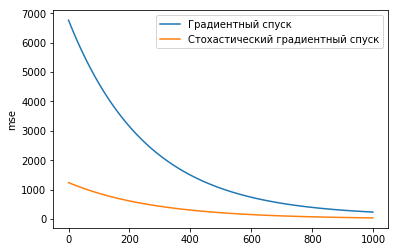

In [31]:
x = np.arange(iterations)
plt.plot(x, err_g, label="Градиентный спуск")
plt.plot(x, err_gb, label="Стохастический градиентный спуск")
plt.ylabel("mse")
plt.legend()
plt.show()

## Задача 2

Модифицировать решение первого задания путем добавления  $L_2$ -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [38]:
def calc_mse(y, y_pred):
    """расчет mse"""
    err = np.mean((y - y_pred)**2)
    return err

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err = np.zeros(iterations)
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err[i-1] = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W**2) 
    if i % (iterations / 10) == 0:
        print(i, W, err[i-1])
    return W, err

In [36]:
W_gv, err_gv = eval_model_reg2(X, y,iterations=iterations, alpha=1e-3)

1000 [-0.74244673 70.43457579] 232.47320897522653


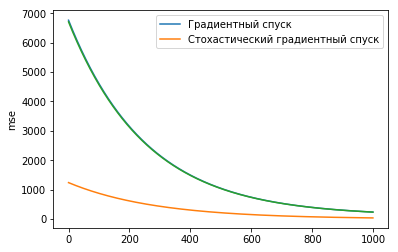

In [37]:
x = np.arange(iterations)
plt.plot(x, err_g, label="Градиентный спуск")
plt.plot(x, err_gb, label="Стохастический градиентный спуск")
plt.plot(x, err_gv)
plt.ylabel("mse")
plt.legend()
plt.show()